In [1]:
import numpy as np
import matplotlib.pylab as plt
import cv2
%matplotlib inline

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
y = train[:,0]

In [4]:
X = train[:,1:]

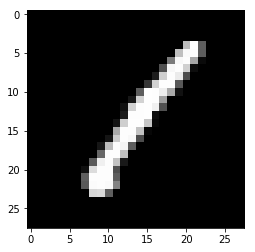

In [5]:
plt.imshow(X.reshape(-1,28,28)[0], cmap='gray')

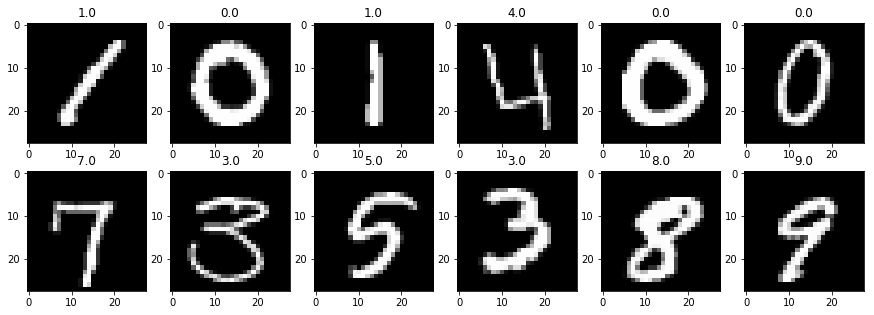

In [7]:
fig = plt.figure(figsize=(15, 5))
for i, img in enumerate(X[:12], 1):
    subplot = fig.add_subplot(2, 6, i)
    plt.imshow(img.reshape(28,28), cmap='gray');
    subplot.set_title('%s' % y[i - 1]);

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=16)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=80)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
knn = KNeighborsClassifier()
params = {'n_neighbors':[6]}
grid = GridSearchCV(knn, params, cv=3)
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_train_pca = pca.fit_transform(X_train)

In [12]:
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [13]:
grid.best_params_

{'n_neighbors': 6}

In [14]:
grid.best_score_

0.9562222222222222

In [15]:
grid.score(pca.transform(X_test), y_test)

0.961047619047619

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(grid.predict(pca.transform(X_test)), y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1039
         1.0       1.00      0.97      0.98      1178
         2.0       0.97      0.97      0.97      1070
         3.0       0.94      0.96      0.95      1128
         4.0       0.96      0.97      0.96      1013
         5.0       0.95      0.96      0.95       890
         6.0       0.98      0.96      0.97      1032
         7.0       0.96      0.97      0.96      1122
         8.0       0.95      0.96      0.95       996
         9.0       0.92      0.93      0.92      1032

   micro avg       0.96      0.96      0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [15]:
print(confusion_matrix(grid.predict(pca.transform(X_test)), y_test))

[[1015    0    5    3    4    0    6    0    1    5]
 [   0 1142    5    5    1    4    1   13    2    5]
 [   2    1 1035    9    2    1    1   11    5    3]
 [   1    0    3 1079    0   19    0    0   15   11]
 [   2    1    2    0  980    0    0    1    5   22]
 [   1    0    1   15    1  852    7    1    9    3]
 [   3    2    1    2    6   15  993    0    7    3]
 [   0    0    7    8    1    0    0 1084    2   20]
 [   0    0   11   19    0    1    2    1  955    7]
 [   1    0    2   11   29    6    0   24    4  955]]


In [16]:
prediction = grid.predict(pca.transform(test))

In [20]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(prediction, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [18]:
type(prediction)

numpy.ndarray

In [19]:
import pandas as pd
result = pd.DataFrame(prediction)
result

,0
0,2.0
1,0.0
2,9.0
3,4.0
4,3.0
5,7.0
6,0.0
7,3.0
8,0.0
9,3.0
